In [1]:
# !pip install prettytable

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import prettytable as pt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
%matplotlib inline

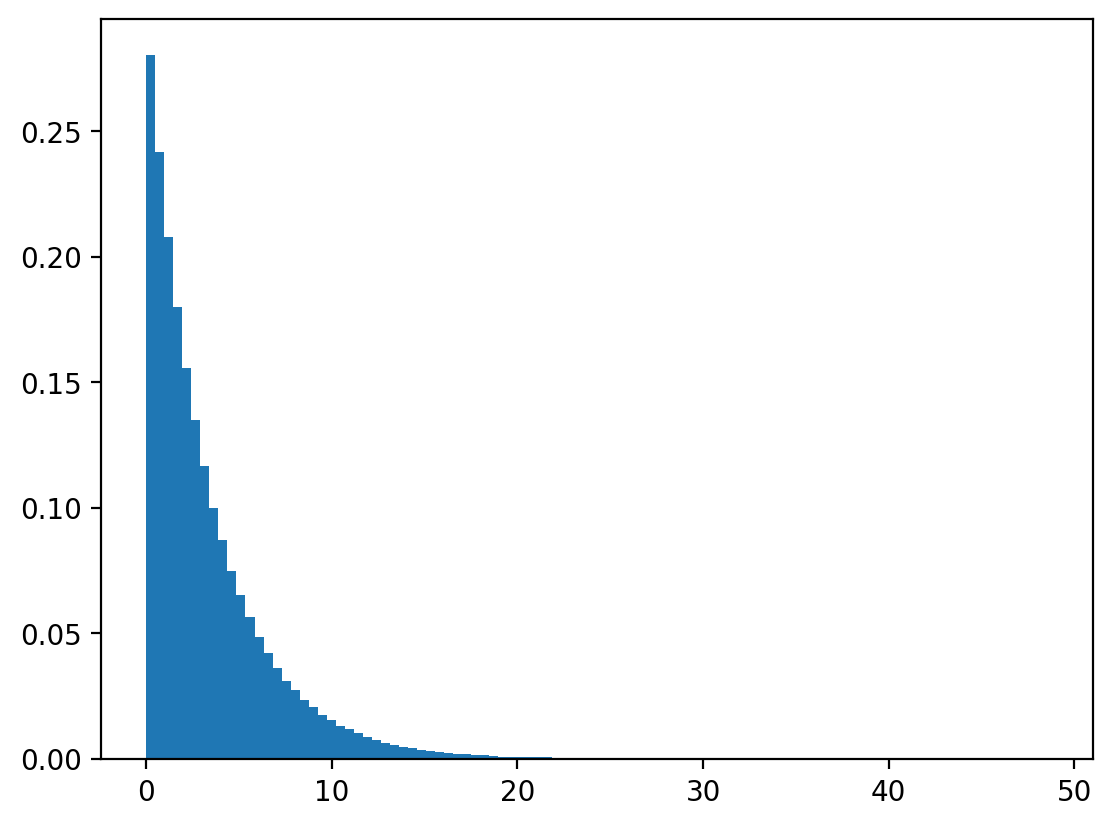

In [3]:
n, λ = 1_000_000, 0.3

# draw uniform numbers
u = np.random.rand(n)

# transform
x = -np.log(1-u)/λ

# draw geometric distributions
x_g = np.random.exponential(1 / λ, n)

# plot and compare
plt.hist(x, bins=100, density=True)
plt.show()

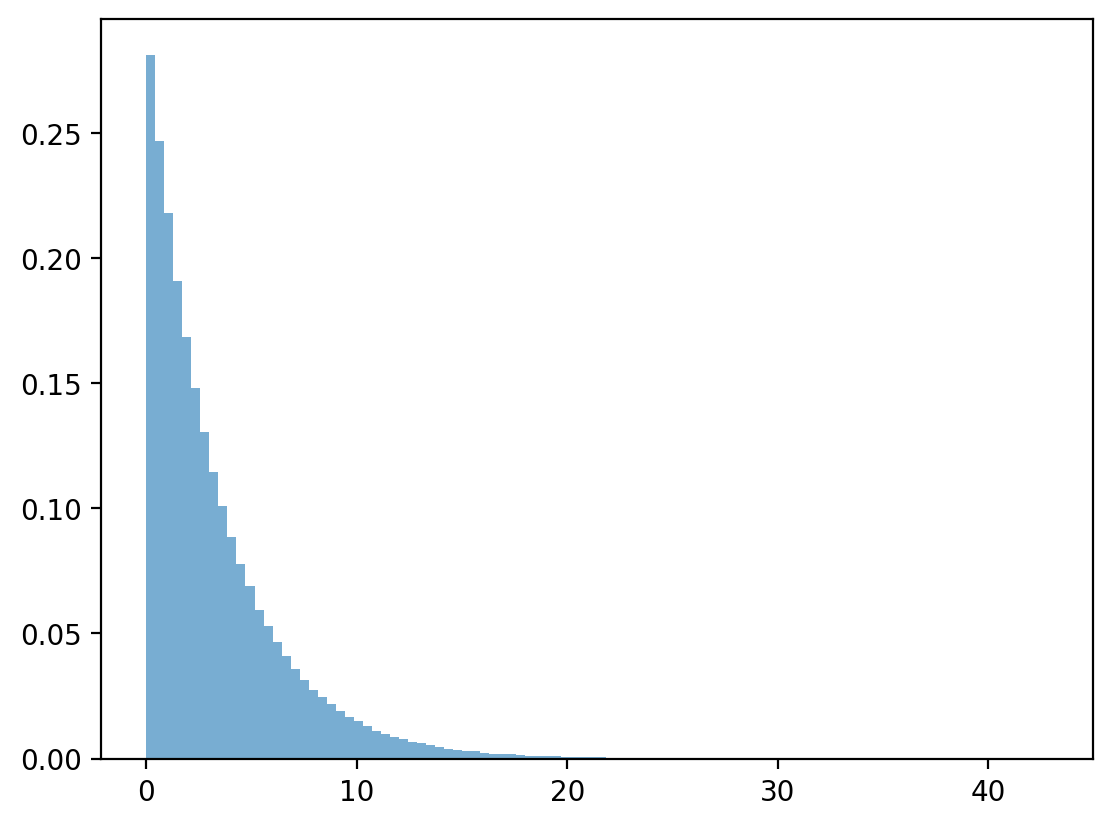

In [4]:
plt.hist(x_g, bins=100, density=True, alpha=0.6)
plt.show()

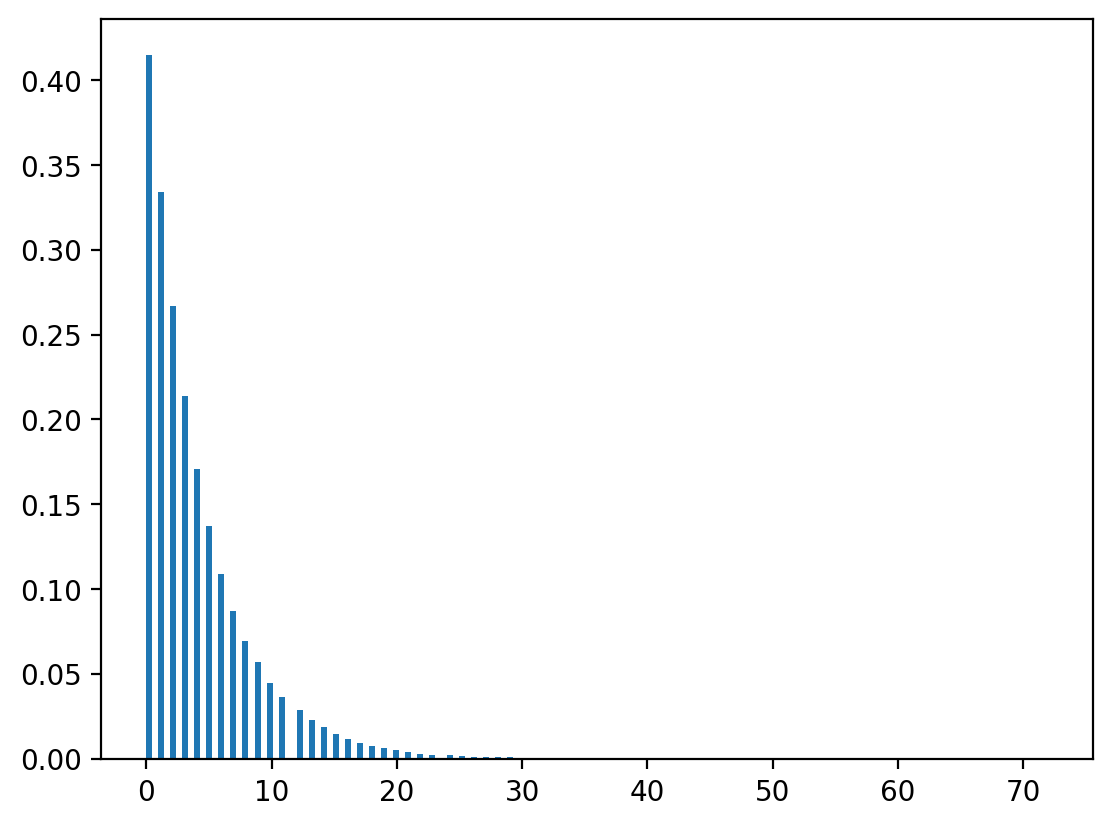

In [5]:
n, λ = 1_000_000, 0.8

# draw uniform numbers
u = np.random.rand(n)

# transform
x = np.ceil(np.log(1-u)/np.log(λ) - 1)

# draw geometric distributions
x_g = np.random.geometric(1-λ, n)

# plot and compare
plt.hist(x, bins=150, density=True)
plt.show()

In [6]:
np.random.geometric(1-λ, n).max()

75

In [7]:
np.log(0.4)/np.log(0.3)

0.7610560044063083

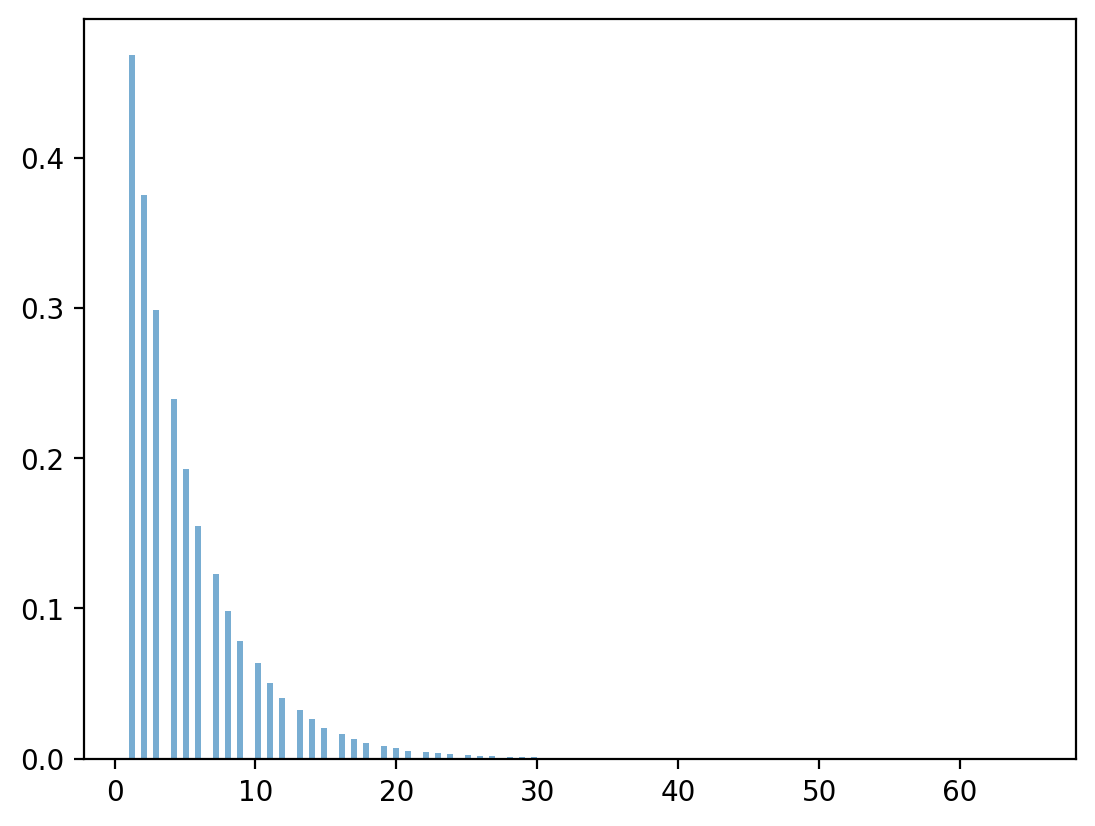

In [8]:
plt.hist(x_g, bins=150, density=True, alpha=0.6)
plt.show()

In [9]:
# specify parameters
p, n = 0.3, 1_000_000

# draw observations from the distribution
x = np.random.geometric(p, n)

# compute sample mean and variance
μ_hat = np.mean(x)
σ2_hat = np.var(x)

print("The sample mean is: ", μ_hat, "\nThe sample variance is: ", σ2_hat)

# compare with theoretical results
print("\nThe population mean is: ", 1/p)
print("The population variance is: ", (1-p)/(p**2))

The sample mean is:  3.330238 
The sample variance is:  7.736484863355997

The population mean is:  3.3333333333333335
The population variance is:  7.777777777777778


In [10]:
Benford_pmf = np.array([np.log10(1+1/d) for d in range(1,10)])
k = np.array(range(1,10))

# mean
mean = np.sum(Benford_pmf * k)

# variance
var = np.sum([(k-mean)**2 * Benford_pmf])

# verify sum to 1
print(np.sum(Benford_pmf))
print(mean)
print(var)

0.9999999999999999
3.4402369671232065
6.056512631375665


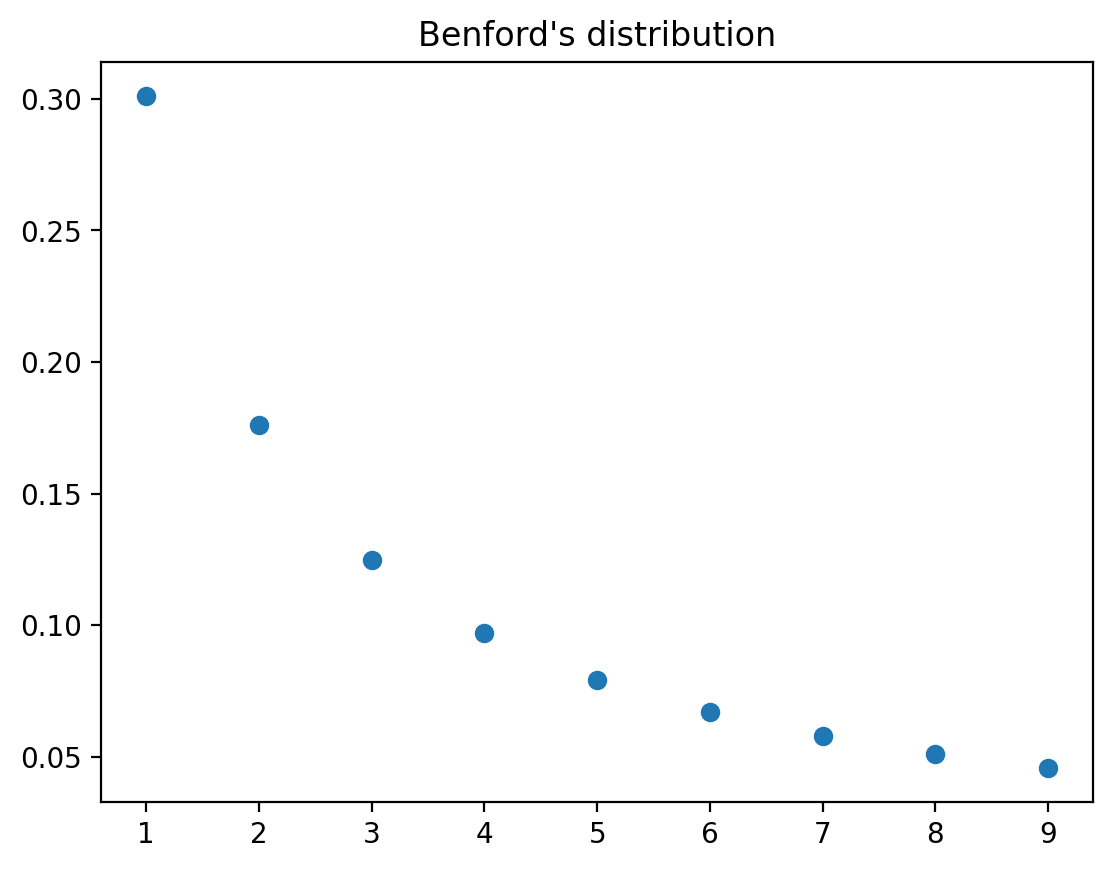

In [11]:
# plot distribution
plt.plot(range(1,10), Benford_pmf, 'o')
plt.title('Benford\'s distribution')
plt.show()

In [12]:
# specify parameters
r, p, n = 10, 0.3, 1_000_000

# draw observations from the distribution
x = np.random.negative_binomial(r, p, n)

# compute sample mean and variance
μ_hat = np.mean(x)
σ2_hat = np.var(x)

print("The sample mean is: ", μ_hat, "\nThe sample variance is: ", σ2_hat)
print("\nThe population mean is: ", r*(1-p)/p)
print("The population variance is: ", r*(1-p)/p**2)

The sample mean is:  23.346666 
The sample variance is:  77.96312068444396

The population mean is:  23.333333333333336
The population variance is:  77.77777777777779


In [13]:
# specify parameters
μ, σ = 0, 0.1

# specify number of draws
n = 1_000_000

# draw observations from the distribution
x = np.random.normal(μ, σ, n)

# compute sample mean and variance
μ_hat = np.mean(x)
σ_hat = np.std(x)

print("The sample mean is: ", μ_hat)
print("The sample standard deviation is: ", σ_hat)

The sample mean is:  -0.00012662125128603147
The sample standard deviation is:  0.09990724315954524


In [14]:
# compare
print(μ-μ_hat < 1e-3)
print(σ-σ_hat < 1e-3)

True
True


In [15]:
# specify parameters
a, b = 10, 20

# specify number of draws
n = 1_000_000

# draw observations from the distribution
x = a + (b-a)*np.random.rand(n)

# compute sample mean and variance
μ_hat = np.mean(x)
σ2_hat = np.var(x)

print("The sample mean is: ", μ_hat, "\nThe sample variance is: ", σ2_hat)
print("\nThe population mean is: ", (a+b)/2)
print("The population variance is: ", (b-a)**2/12)

The sample mean is:  15.0023532048563 
The sample variance is:  8.337338238765225

The population mean is:  15.0
The population variance is:  8.333333333333334


In [16]:
x = np.random.rand(1_000_000)
# x[x > 0.95] = 100*x[x > 0.95]+300
x[x > 0.95] = 100*np.random.rand(len(x[x > 0.95]))+300
x[x <= 0.95] = 0

μ_hat = np.mean(x)
σ2_hat = np.var(x)

print("The sample mean is: ", μ_hat, "\nThe sample variance is: ", σ2_hat)

The sample mean is:  17.53666879660307 
The sample variance is:  5871.101612307932


In [17]:
mean = 0.0005*0.5*(400**2 - 300**2)
var = 0.95*17.5**2+0.0005/3*((400-17.5)**3-(300-17.5)**3)
print("mean: ", mean)
print("variance: ", var)

mean:  17.5
variance:  5860.416666666666


In [18]:
# specify parameters
xs = np.array([0, 1])
ys = np.array([10, 20])
f = np.array([[0.3, 0.2], [0.1, 0.4]])
f_cum = np.cumsum(f)

# draw random numbers
p = np.random.rand(1_000_000)
x = np.vstack([xs[1]*np.ones(p.shape), ys[1]*np.ones(p.shape)])
# map to the bivariate distribution

x[0, p < f_cum[2]] = xs[1]
x[1, p < f_cum[2]] = ys[0]

x[0, p < f_cum[1]] = xs[0]
x[1, p < f_cum[1]] = ys[1]

x[0, p < f_cum[0]] = xs[0]
x[1, p < f_cum[0]] = ys[0]
print(x)

[[ 0.  0.  1. ...  0.  0.  1.]
 [10. 20. 20. ... 10. 10. 10.]]


In [19]:
# marginal distribution
xp = np.sum(x[0, :] == xs[0])/1_000_000
yp = np.sum(x[1, :] == ys[0])/1_000_000

# print output
print("marginal distribution for x")
xmtb = pt.PrettyTable()
xmtb.field_names = ['x_value', 'x_prob']
xmtb.add_row([xs[0], xp])
xmtb.add_row([xs[1], 1-xp])
print(xmtb)

print("\nmarginal distribution for y")
ymtb = pt.PrettyTable()
ymtb.field_names = ['y_value', 'y_prob']
ymtb.add_row([ys[0], yp])
ymtb.add_row([ys[1], 1-yp])
print(ymtb)

marginal distribution for x
+---------+----------+
| x_value |  x_prob  |
+---------+----------+
|    0    | 0.499808 |
|    1    | 0.500192 |
+---------+----------+

marginal distribution for y
+---------+----------+
| y_value |  y_prob  |
+---------+----------+
|    10   | 0.399561 |
|    20   | 0.600439 |
+---------+----------+


In [20]:
# conditional distributions
xc1 = x[0, x[1, :] == ys[0]]
xc2 = x[0, x[1, :] == ys[1]]
yc1 = x[1, x[0, :] == xs[0]]
yc2 = x[1, x[0, :] == xs[1]]

xc1p = np.sum(xc1 == xs[0])/len(xc1)
xc2p = np.sum(xc2 == xs[0])/len(xc2)
yc1p = np.sum(yc1 == ys[0])/len(yc1)
yc2p = np.sum(yc2 == ys[0])/len(yc2)

# print output
print("conditional distribution for x")
xctb = pt.PrettyTable()
xctb.field_names = ['y_value', 'prob(x=0)', 'prob(x=1)']
xctb.add_row([ys[0], xc1p, 1-xc1p])
xctb.add_row([ys[1], xc2p, 1-xc2p])
print(xctb)

print("\nconditional distribution for y")
yctb = pt.PrettyTable()
yctb.field_names = ['x_value',  'prob(y=10)', 'prob(y=20)']
yctb.add_row([xs[0], yc1p, 1-yc1p])
yctb.add_row([xs[1], yc2p, 1-yc2p])
print(yctb)

conditional distribution for x
+---------+--------------------+---------------------+
| y_value |     prob(x=0)      |      prob(x=1)      |
+---------+--------------------+---------------------+
|    10   | 0.7492247741896731 | 0.25077522581032685 |
|    20   | 0.3338340780662149 |  0.6661659219337851 |
+---------+--------------------+---------------------+

conditional distribution for y
+---------+--------------------+---------------------+
| x_value |     prob(y=10)     |      prob(y=20)     |
+---------+--------------------+---------------------+
|    0    | 0.5989519975670657 | 0.40104800243293426 |
|    1    | 0.2003230759388395 |  0.7996769240611605 |
+---------+--------------------+---------------------+


In [21]:
class discrete_bijoint:

    def __init__(self, f, xs, ys):
        '''initialization
        -----------------
        parameters:
        f: the bivariate joint probability matrix
        xs: values of x vector
        ys: values of y vector
        '''
        self.f, self.xs, self.ys = f, xs, ys

    def joint_tb(self):
        '''print the joint distribution table'''
        xs = self.xs
        ys = self.ys
        f = self.f
        jtb = pt.PrettyTable()
        jtb.field_names = ['x_value/y_value', *ys, 'marginal sum for x']
        for i in range(len(xs)):
            jtb.add_row([xs[i], *f[i, :], np.sum(f[i, :])])
        jtb.add_row(['marginal_sum for y', *np.sum(f, 0), np.sum(f)])
        print("\nThe joint probability distribution for x and y\n", jtb)
        self.jtb = jtb

    def draw(self, n):
        '''draw random numbers
        ----------------------
        parameters:
        n: number of random numbers to draw
        '''
        xs = self.xs
        ys = self.ys
        f_cum = np.cumsum(self.f)
        p = np.random.rand(n)
        x = np.empty([2, p.shape[0]])
        lf = len(f_cum)
        lx = len(xs)-1
        ly = len(ys)-1
        for i in range(lf):
            x[0, p < f_cum[lf-1-i]] = xs[lx]
            x[1, p < f_cum[lf-1-i]] = ys[ly]
            if ly == 0:
                lx -= 1
                ly = len(ys)-1
            else:
                ly -= 1
        self.x = x
        self.n = n

    def marg_dist(self):
        '''marginal distribution'''
        x = self.x
        xs = self.xs
        ys = self.ys
        n = self.n
        xmp = [np.sum(x[0, :] == xs[i])/n for i in range(len(xs))]
        ymp = [np.sum(x[1, :] == ys[i])/n for i in range(len(ys))]

        # print output
        xmtb = pt.PrettyTable()
        ymtb = pt.PrettyTable()
        xmtb.field_names = ['x_value', 'x_prob']
        ymtb.field_names = ['y_value', 'y_prob']
        for i in range(max(len(xs), len(ys))):
            if i < len(xs):
                xmtb.add_row([xs[i], xmp[i]])
            if i < len(ys):
                ymtb.add_row([ys[i], ymp[i]])
        xmtb.add_row(['sum', np.sum(xmp)])
        ymtb.add_row(['sum', np.sum(ymp)])
        print("\nmarginal distribution for x\n", xmtb)
        print("\nmarginal distribution for y\n", ymtb)

        self.xmp = xmp
        self.ymp = ymp

    def cond_dist(self):
        '''conditional distribution'''
        x = self.x
        xs = self.xs
        ys = self.ys
        n = self.n
        xcp = np.empty([len(ys), len(xs)])
        ycp = np.empty([len(xs), len(ys)])
        for i in range(max(len(ys), len(xs))):
            if i < len(ys):
                xi = x[0, x[1, :] == ys[i]]
                idx = xi.reshape(len(xi), 1) == xs.reshape(1, len(xs))
                xcp[i, :] = np.sum(idx, 0)/len(xi)
            if i < len(xs):
                yi = x[1, x[0, :] == xs[i]]
                idy = yi.reshape(len(yi), 1) == ys.reshape(1, len(ys))
                ycp[i, :] = np.sum(idy, 0)/len(yi)

        # print output
        xctb = pt.PrettyTable()
        yctb = pt.PrettyTable()
        xctb.field_names = ['x_value', *xs, 'sum']
        yctb.field_names = ['y_value', *ys, 'sum']
        for i in range(max(len(xs), len(ys))):
            if i < len(ys):
                xctb.add_row([ys[i], *xcp[i], np.sum(xcp[i])])
            if i < len(xs):
                yctb.add_row([xs[i], *ycp[i], np.sum(ycp[i])])
        print("\nconditional distribution for x\n", xctb)
        print("\nconditional distribution for y\n", yctb)

        self.xcp = xcp
        self.xyp = ycp

In [22]:
# joint
d = discrete_bijoint(f, xs, ys)
d.joint_tb()


The joint probability distribution for x and y
 +--------------------+-----+--------------------+--------------------+
|  x_value/y_value   |  10 |         20         | marginal sum for x |
+--------------------+-----+--------------------+--------------------+
|         0          | 0.3 |        0.2         |        0.5         |
|         1          | 0.1 |        0.4         |        0.5         |
| marginal_sum for y | 0.4 | 0.6000000000000001 |        1.0         |
+--------------------+-----+--------------------+--------------------+


In [23]:
# sample marginal
d.draw(1_000_000)
d.marg_dist()


marginal distribution for x
 +---------+----------+
| x_value |  x_prob  |
+---------+----------+
|    0    | 0.499965 |
|    1    | 0.500035 |
|   sum   |   1.0    |
+---------+----------+

marginal distribution for y
 +---------+----------+
| y_value |  y_prob  |
+---------+----------+
|    10   | 0.400014 |
|    20   | 0.599986 |
|   sum   |   1.0    |
+---------+----------+


In [24]:
# sample conditional
d.cond_dist()


conditional distribution for x
 +---------+---------------------+-------------------+-----+
| x_value |          0          |         1         | sum |
+---------+---------------------+-------------------+-----+
|    10   |  0.7505012324568641 | 0.249498767543136 | 1.0 |
|    20   | 0.33293110172570695 | 0.667068898274293 | 1.0 |
+---------+---------------------+-------------------+-----+

conditional distribution for y
 +---------+---------------------+---------------------+-----+
| y_value |          10         |          20         | sum |
+---------+---------------------+---------------------+-----+
|    0    |  0.6004640324822738 | 0.39953596751772624 | 1.0 |
|    1    | 0.19959202855800093 |  0.800407971441999  | 1.0 |
+---------+---------------------+---------------------+-----+


In [25]:
xs_new = np.array([10, 20, 30])
ys_new = np.array([1, 2])
f_new = np.array([[0.2, 0.1], [0.1, 0.3], [0.15, 0.15]])
d_new = discrete_bijoint(f_new, xs_new, ys_new)
d_new.joint_tb()


The joint probability distribution for x and y
 +--------------------+---------------------+------+---------------------+
|  x_value/y_value   |          1          |  2   |  marginal sum for x |
+--------------------+---------------------+------+---------------------+
|         10         |         0.2         | 0.1  | 0.30000000000000004 |
|         20         |         0.1         | 0.3  |         0.4         |
|         30         |         0.15        | 0.15 |         0.3         |
| marginal_sum for y | 0.45000000000000007 | 0.55 |         1.0         |
+--------------------+---------------------+------+---------------------+


In [26]:
d_new.draw(1_000_000)
d_new.marg_dist()


marginal distribution for x
 +---------+----------+
| x_value |  x_prob  |
+---------+----------+
|    10   | 0.299503 |
|    20   | 0.400347 |
|    30   | 0.30015  |
|   sum   |   1.0    |
+---------+----------+

marginal distribution for y
 +---------+----------+
| y_value |  y_prob  |
+---------+----------+
|    1    | 0.450716 |
|    2    | 0.549284 |
|   sum   |   1.0    |
+---------+----------+


In [27]:
d_new.cond_dist()


conditional distribution for x
 +---------+---------------------+---------------------+--------------------+-----+
| x_value |          10         |          20         |         30         | sum |
+---------+---------------------+---------------------+--------------------+-----+
|    1    | 0.44403571206702225 | 0.22199345042110774 |  0.33397083751187  | 1.0 |
|    2    |  0.1809064163529249 |  0.5466953342897299 | 0.2723982493573452 | 1.0 |
+---------+---------------------+---------------------+--------------------+-----+

conditional distribution for y
 +---------+--------------------+--------------------+-----+
| y_value |         1          |         2          | sum |
+---------+--------------------+--------------------+-----+
|    10   | 0.6682203517160096 | 0.3317796482839905 | 1.0 |
|    20   | 0.2499231916312599 | 0.7500768083687401 | 1.0 |
|    30   | 0.5015025820423121 | 0.4984974179576878 | 1.0 |
+---------+--------------------+--------------------+-----+


In [28]:
# define the joint probability density function
def func(x, y, μ1=0, μ2=5, σ1=np.sqrt(5), σ2=np.sqrt(1), ρ=.2/np.sqrt(5*1)):
    A = (2 * np.pi * σ1 * σ2 * np.sqrt(1 - ρ**2))**(-1)
    B = -1 / 2 / (1 - ρ**2)
    C1 = (x - μ1)**2 / σ1**2
    C2 = 2 * ρ * (x - μ1) * (y - μ2) / σ1 / σ2
    C3 = (y - μ2)**2 / σ2**2
    return A * np.exp(B * (C1 - C2 + C3))

In [29]:
μ1 = 0
μ2 = 5
σ1 = np.sqrt(5)
σ2 = np.sqrt(1)
ρ = .2 / np.sqrt(5 * 1)

In [30]:
x = np.linspace(-10, 10, 1_000)
y = np.linspace(-10, 10, 1_000)
x_mesh, y_mesh = np.meshgrid(x, y, indexing="ij")

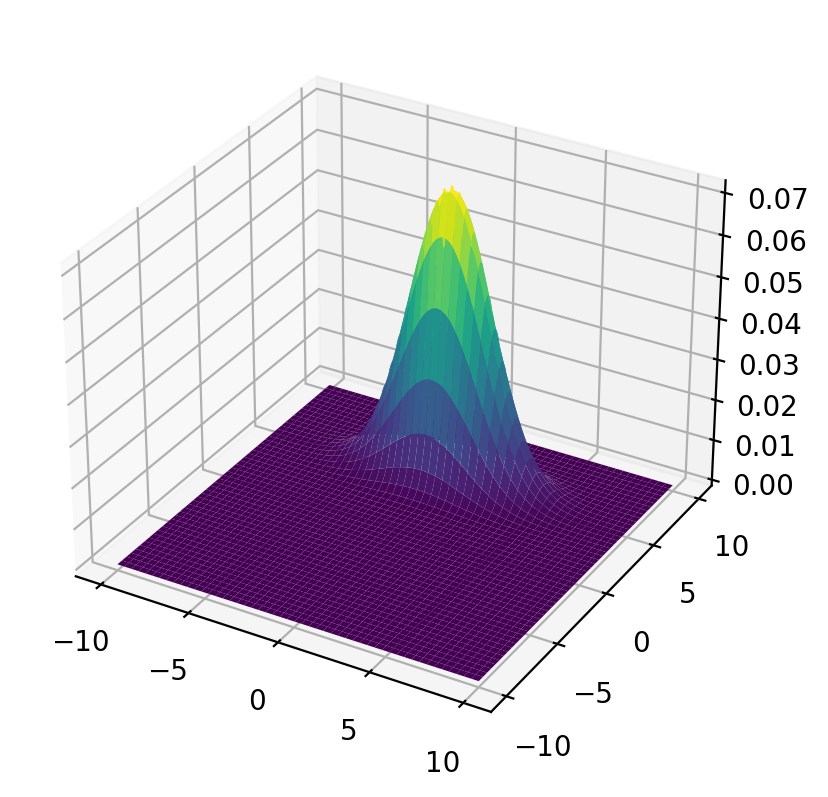

In [31]:
# %matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')

surf = ax.plot_surface(x_mesh, y_mesh, func(x_mesh, y_mesh), cmap='viridis')
plt.show()

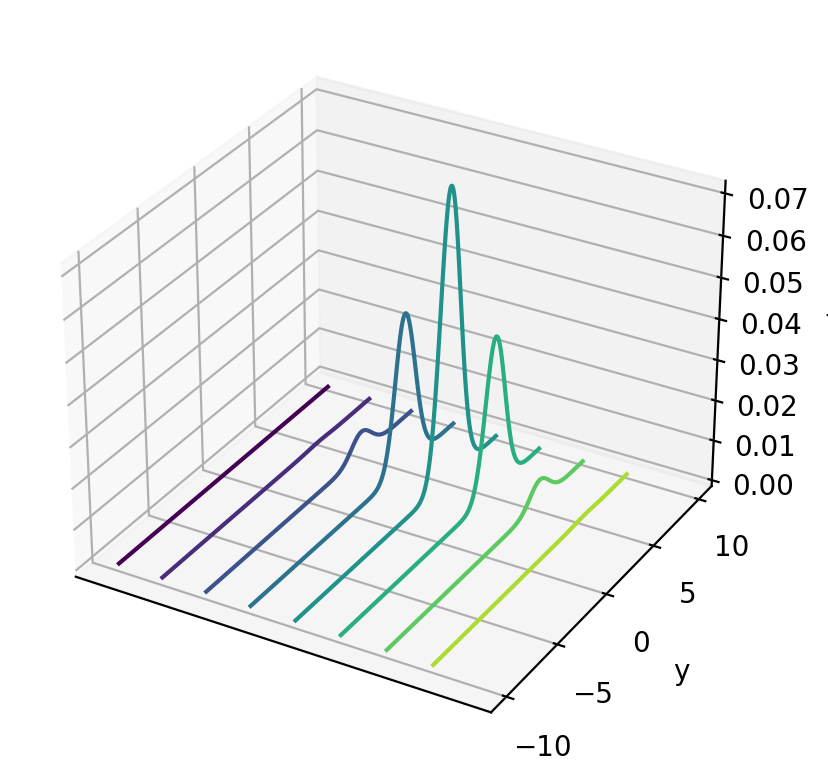

In [32]:
# %matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')

curve = ax.contour(x_mesh, y_mesh, func(x_mesh, y_mesh), zdir='x')
plt.ylabel('y')
ax.set_zlabel('f')
ax.set_xticks([])
plt.show()

In [33]:
μ= np.array([0, 5])
σ= np.array([[5, .2], [.2, 1]])
n = 1_000_000
data = np.random.multivariate_normal(μ, σ, n)
x = data[:, 0]
y = data[:, 1]

0.001325685791891446 2.2348546343647664


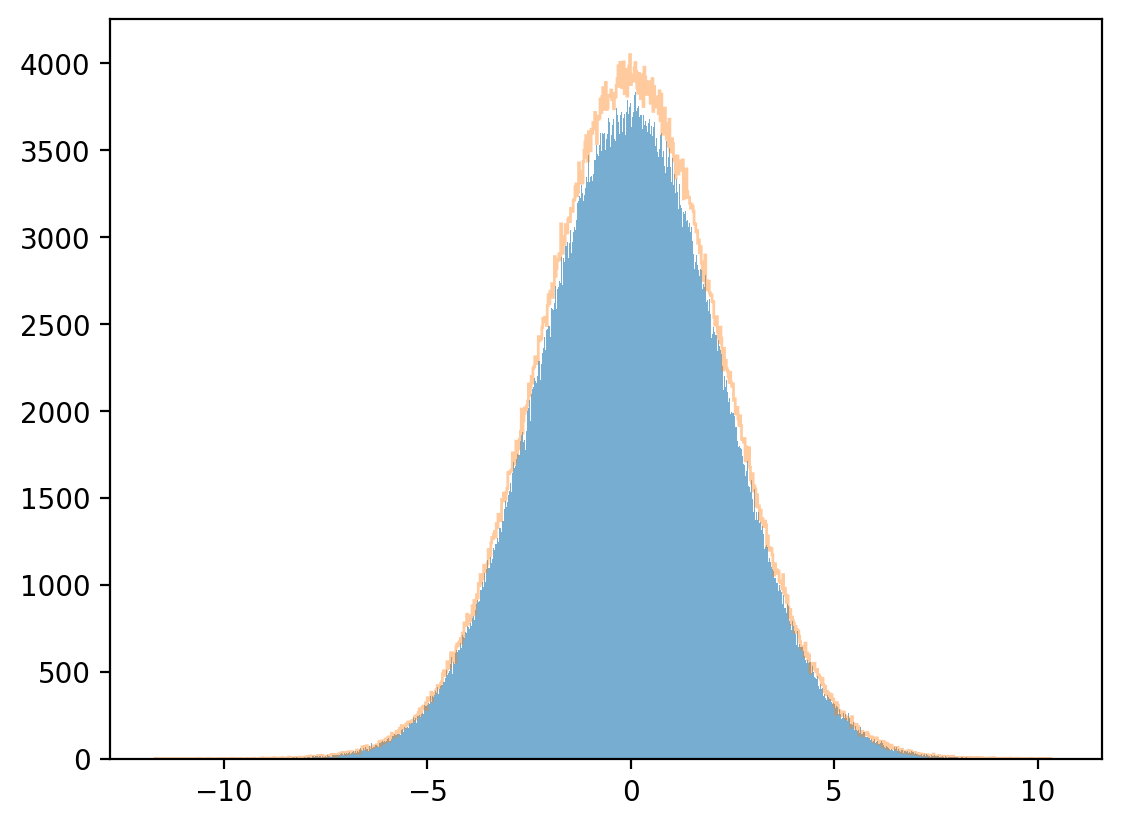

In [34]:
plt.hist(x, bins=1_000, alpha=0.6)
μx_hat, σx_hat = np.mean(x), np.std(x)
print(μx_hat, σx_hat)
x_sim = np.random.normal(μx_hat, σx_hat, 1_000_000)
plt.hist(x_sim, bins=1_000, alpha=0.4, histtype="step")
plt.show()

4.998067171370326 0.999866703555383


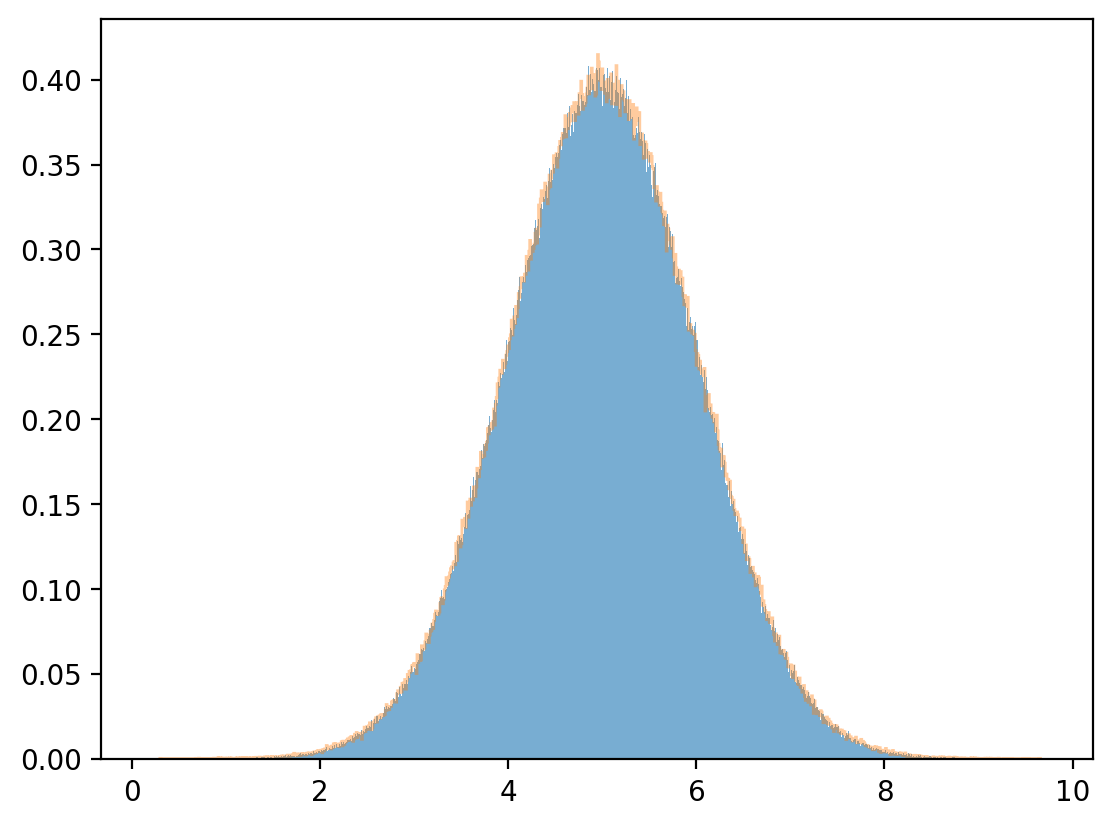

In [35]:
plt.hist(y, bins=1_000, density=True, alpha=0.6)
μy_hat, σy_hat = np.mean(y), np.std(y)
print(μy_hat, σy_hat)
y_sim = np.random.normal(μy_hat, σy_hat, 1_000_000)
plt.hist(y_sim, bins=1_000, density=True, alpha=0.4, histtype="step")
plt.show()

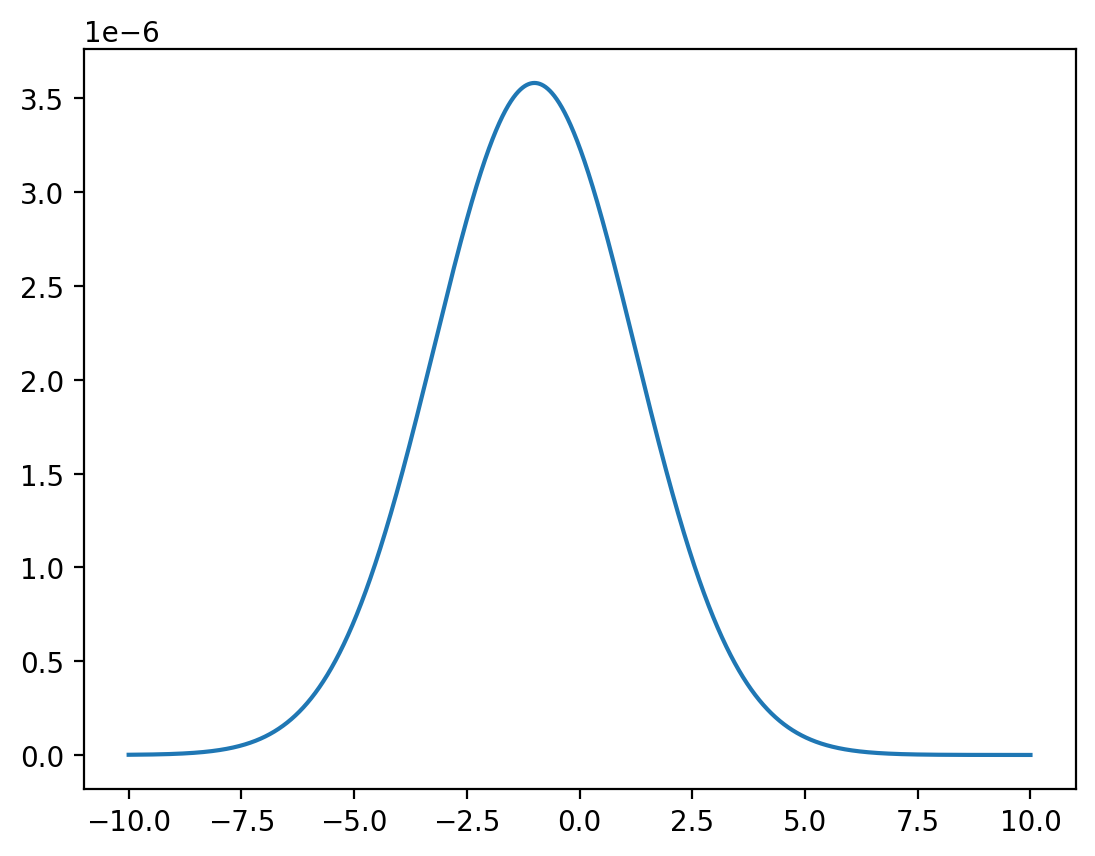

In [36]:
# discretized marginal density
x = np.linspace(-10, 10, 1_000_000)
z = func(x, y=0) / np.sum(func(x, y=0))
plt.plot(x, z)
plt.show()

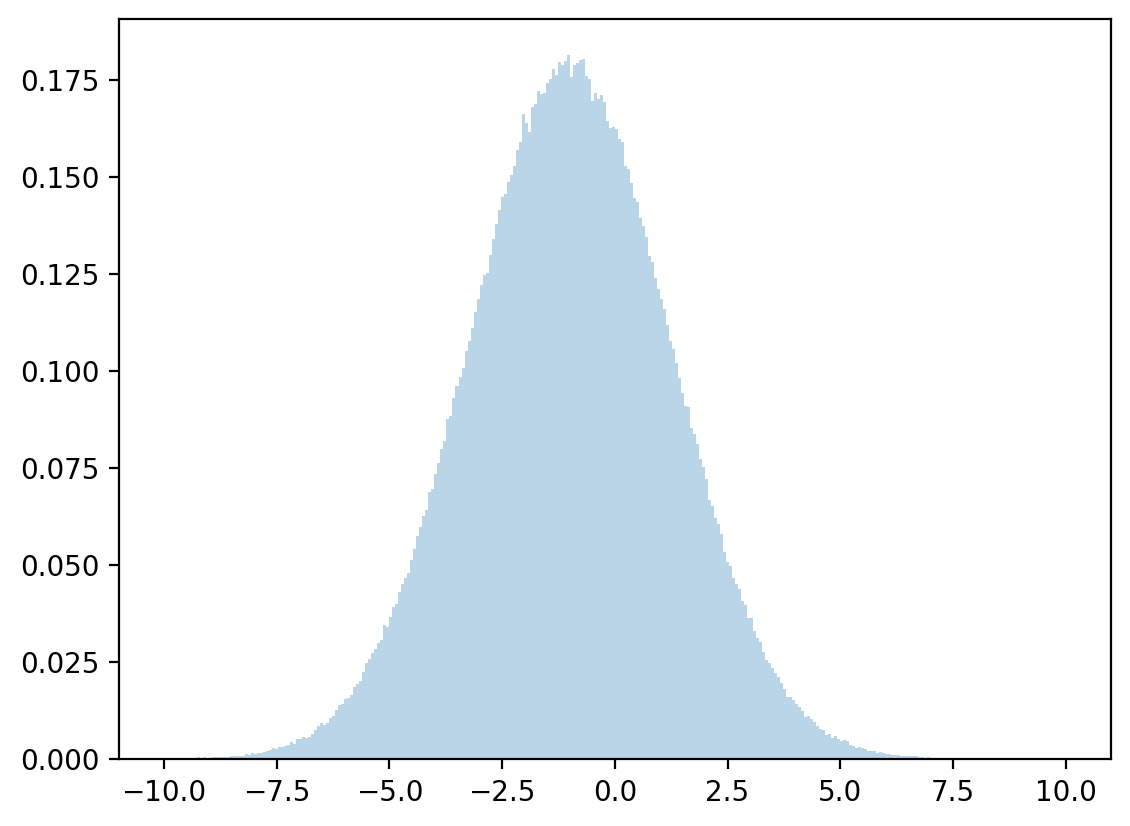

In [37]:
# discretized mean
μx = np.dot(x, z)

# discretized standard deviation
σx = np.sqrt(np.dot((x - μx)**2, z))

# sample
zz = np.random.normal(μx, σx, 1_000_000)
plt.hist(zz, bins=300, density=True, alpha=0.3, range=[-10, 10])
plt.show()

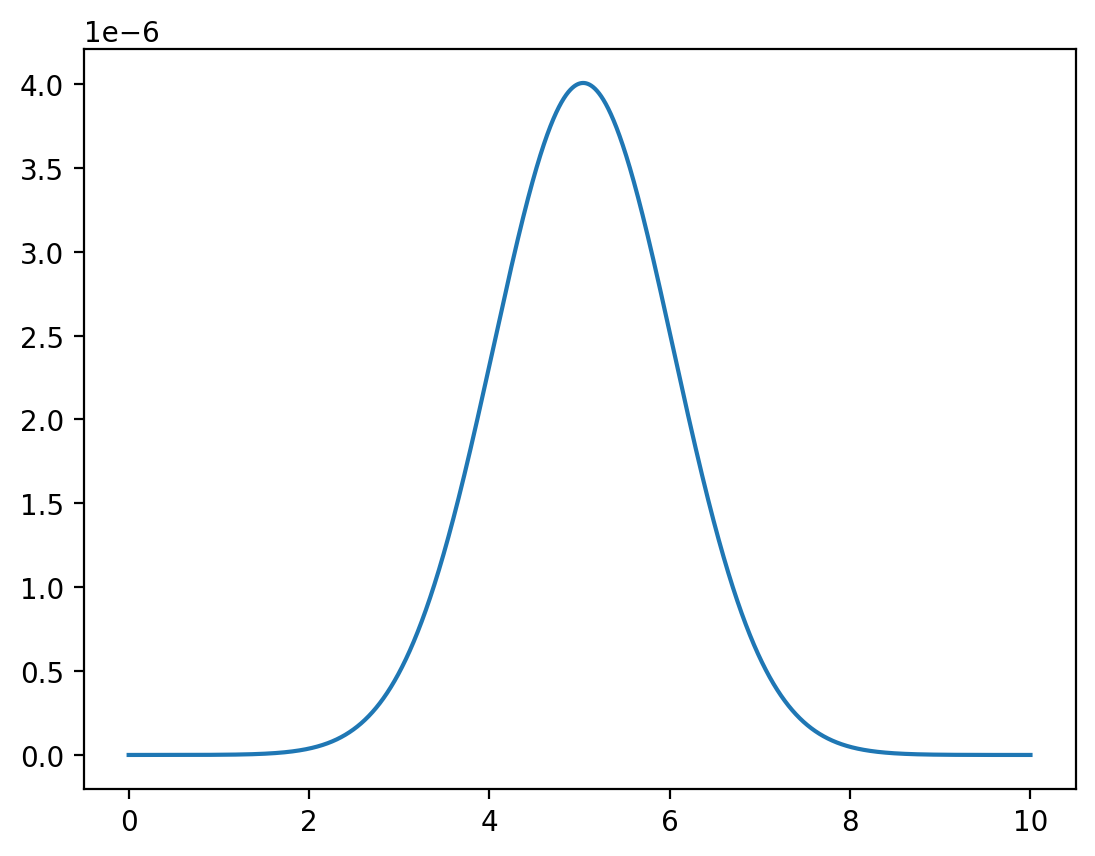

In [38]:
y = np.linspace(0, 10, 1_000_000)
z = func(x=1, y=y) / np.sum(func(x=1, y=y))
plt.plot(y,z)
plt.show()

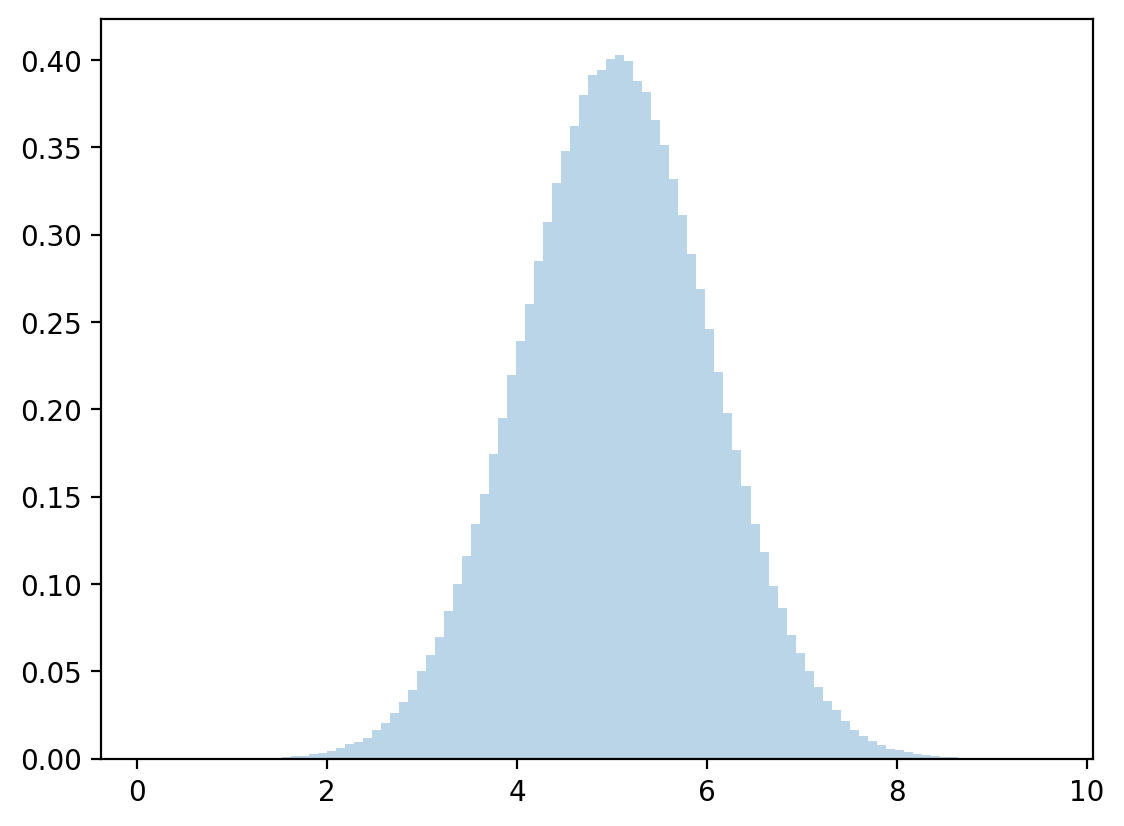

In [39]:
# discretized mean and standard deviation
μy = np.dot(y,z)
σy = np.sqrt(np.dot((y - μy)**2, z))

# sample
zz = np.random.normal(μy,σy,1_000_000)
plt.hist(zz, bins=100, density=True, alpha=0.3)
plt.show()

In [40]:
print(μx, σx)
print(μ1 + ρ * σ1 * (0 - μ2) / σ2, np.sqrt(σ1**2 * (1 - ρ**2)))

print(μy, σy)
print(μ2 + ρ * σ2 * (1 - μ1) / σ1, np.sqrt(σ2**2 * (1 - ρ**2)))

-0.9997518414498721 2.226584133169757
-1.0 2.227105745132009
5.039999456960841 0.9959851265795615
5.04 0.9959919678390986


In [41]:
# define parameters
mu = np.array([0.6, 0.4])
nu = np.array([0.3, 0.7])

# number of draws
draws = 1_000_000

# generate draws from uniform distribution
p = np.random.rand(draws)

# generate draws of X and Y via uniform distribution
x = np.ones(draws)
y = np.ones(draws)
x[p <= mu[0]] = 0
x[p > mu[0]] = 1
y[p <= nu[0]] = 0
y[p > nu[0]] = 1

In [42]:
# calculate parameters from draws
q_hat = sum(x[x == 1])/draws
r_hat = sum(y[y == 1])/draws

# print output
print("distribution for x")
xmtb = pt.PrettyTable()
xmtb.field_names = ['x_value', 'x_prob']
xmtb.add_row([0, 1-q_hat])
xmtb.add_row([1, q_hat])
print(xmtb)

print("distribution for y")
ymtb = pt.PrettyTable()
ymtb.field_names = ['y_value', 'y_prob']
ymtb.add_row([0, 1-r_hat])
ymtb.add_row([1, r_hat])
print(ymtb)

distribution for x
+---------+--------------------+
| x_value |       x_prob       |
+---------+--------------------+
|    0    | 0.6000369999999999 |
|    1    |      0.399963      |
+---------+--------------------+
distribution for y
+---------+---------------------+
| y_value |        y_prob       |
+---------+---------------------+
|    0    | 0.29939000000000004 |
|    1    |       0.70061       |
+---------+---------------------+


In [43]:
# define parameters
f1 = np.array([[0.18, 0.42], [0.12, 0.28]])
f1_cum = np.cumsum(f1)

# number of draws
draws1 = 1_000_000

# generate draws from uniform distribution
p = np.random.rand(draws1)

# generate draws of first copuling via uniform distribution
c1 = np.vstack([np.ones(draws1), np.ones(draws1)])
# X=0, Y=0
c1[0, p <= f1_cum[0]] = 0
c1[1, p <= f1_cum[0]] = 0
# X=0, Y=1
c1[0, (p > f1_cum[0])*(p <= f1_cum[1])] = 0
c1[1, (p > f1_cum[0])*(p <= f1_cum[1])] = 1
# X=1, Y=0
c1[0, (p > f1_cum[1])*(p <= f1_cum[2])] = 1
c1[1, (p > f1_cum[1])*(p <= f1_cum[2])] = 0
# X=1, Y=1
c1[0, (p > f1_cum[2])*(p <= f1_cum[3])] = 1
c1[1, (p > f1_cum[2])*(p <= f1_cum[3])] = 1

In [44]:
# calculate parameters from draws
f1_00 = sum((c1[0, :] == 0)*(c1[1, :] == 0))/draws1
f1_01 = sum((c1[0, :] == 0)*(c1[1, :] == 1))/draws1
f1_10 = sum((c1[0, :] == 1)*(c1[1, :] == 0))/draws1
f1_11 = sum((c1[0, :] == 1)*(c1[1, :] == 1))/draws1

# print output of first joint distribution
print("first joint distribution for c1")
c1_mtb = pt.PrettyTable()
c1_mtb.field_names = ['c1_x_value', 'c1_y_value', 'c1_prob']
c1_mtb.add_row([0, 0, f1_00])
c1_mtb.add_row([0, 1, f1_01])
c1_mtb.add_row([1, 0, f1_10])
c1_mtb.add_row([1, 1, f1_11])
print(c1_mtb)

first joint distribution for c1
+------------+------------+----------+
| c1_x_value | c1_y_value | c1_prob  |
+------------+------------+----------+
|     0      |     0      | 0.180045 |
|     0      |     1      | 0.419676 |
|     1      |     0      | 0.120378 |
|     1      |     1      | 0.279901 |
+------------+------------+----------+


In [45]:
# calculate parameters from draws
c1_q_hat = sum(c1[0, :] == 1)/draws1
c1_r_hat = sum(c1[1, :] == 1)/draws1

# print output
print("marginal distribution for x")
c1_x_mtb = pt.PrettyTable()
c1_x_mtb.field_names = ['c1_x_value', 'c1_x_prob']
c1_x_mtb.add_row([0, 1-c1_q_hat])
c1_x_mtb.add_row([1, c1_q_hat])
print(c1_x_mtb)

print("marginal distribution for y")
c1_ymtb = pt.PrettyTable()
c1_ymtb.field_names = ['c1_y_value', 'c1_y_prob']
c1_ymtb.add_row([0, 1-c1_r_hat])
c1_ymtb.add_row([1, c1_r_hat])
print(c1_ymtb)

marginal distribution for x
+------------+-----------+
| c1_x_value | c1_x_prob |
+------------+-----------+
|     0      |  0.599721 |
|     1      |  0.400279 |
+------------+-----------+
marginal distribution for y
+------------+-----------+
| c1_y_value | c1_y_prob |
+------------+-----------+
|     0      |  0.300423 |
|     1      |  0.699577 |
+------------+-----------+


In [46]:
# define parameters
f2 = np.array([[0.3, 0.3], [0, 0.4]])
f2_cum = np.cumsum(f2)

# number of draws
draws2 = 1_000_000

# generate draws from uniform distribution
p = np.random.rand(draws2)

# generate draws of first coupling via uniform distribution
c2 = np.vstack([np.ones(draws2), np.ones(draws2)])
# X=0, Y=0
c2[0, p <= f2_cum[0]] = 0
c2[1, p <= f2_cum[0]] = 0
# X=0, Y=1
c2[0, (p > f2_cum[0])*(p <= f2_cum[1])] = 0
c2[1, (p > f2_cum[0])*(p <= f2_cum[1])] = 1
# X=1, Y=0
c2[0, (p > f2_cum[1])*(p <= f2_cum[2])] = 1
c2[1, (p > f2_cum[1])*(p <= f2_cum[2])] = 0
# X=1, Y=1
c2[0, (p > f2_cum[2])*(p <= f2_cum[3])] = 1
c2[1, (p > f2_cum[2])*(p <= f2_cum[3])] = 1

In [47]:
# calculate parameters from draws
f2_00 = sum((c2[0, :] == 0)*(c2[1, :] == 0))/draws2
f2_01 = sum((c2[0, :] == 0)*(c2[1, :] == 1))/draws2
f2_10 = sum((c2[0, :] == 1)*(c2[1, :] == 0))/draws2
f2_11 = sum((c2[0, :] == 1)*(c2[1, :] == 1))/draws2

# print output of second joint distribution
print("first joint distribution for c2")
c2_mtb = pt.PrettyTable()
c2_mtb.field_names = ['c2_x_value', 'c2_y_value', 'c2_prob']
c2_mtb.add_row([0, 0, f2_00])
c2_mtb.add_row([0, 1, f2_01])
c2_mtb.add_row([1, 0, f2_10])
c2_mtb.add_row([1, 1, f2_11])
print(c2_mtb)

first joint distribution for c2
+------------+------------+----------+
| c2_x_value | c2_y_value | c2_prob  |
+------------+------------+----------+
|     0      |     0      | 0.29959  |
|     0      |     1      | 0.300219 |
|     1      |     0      |   0.0    |
|     1      |     1      | 0.400191 |
+------------+------------+----------+


In [48]:
# calculate parameters from draws
c2_q_hat = sum(c2[0, :] == 1)/draws2
c2_r_hat = sum(c2[1, :] == 1)/draws2

# print output
print("marginal distribution for x")
c2_x_mtb = pt.PrettyTable()
c2_x_mtb.field_names = ['c2_x_value', 'c2_x_prob']
c2_x_mtb.add_row([0, 1-c2_q_hat])
c2_x_mtb.add_row([1, c2_q_hat])
print(c2_x_mtb)

print("marginal distribution for y")
c2_ymtb = pt.PrettyTable()
c2_ymtb.field_names = ['c2_y_value', 'c2_y_prob']
c2_ymtb.add_row([0, 1-c2_r_hat])
c2_ymtb.add_row([1, c2_r_hat])
print(c2_ymtb)

marginal distribution for x
+------------+-----------+
| c2_x_value | c2_x_prob |
+------------+-----------+
|     0      |  0.599809 |
|     1      |  0.400191 |
+------------+-----------+
marginal distribution for y
+------------+-----------+
| c2_y_value | c2_y_prob |
+------------+-----------+
|     0      |  0.29959  |
|     1      |  0.70041  |
+------------+-----------+
